In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Data/matched_wtd.csv')

In [3]:
data.head(10)

,SG,Top_Class,Formula,Source,ID,centered,natoms,nelectrons,dim,bandgap,directbandgap,metallicity,Z2,wcc,separated_formula,split,wtd_en,wtd_rad
0,2,2.0,Ta6S,ICSD,202564,1.0,14.0,168.0,3.0,0.0,0.020,0.355,(1;100),0.0,"['Ta', 'Ta', 'Ta', 'Ta', 'Ta', 'Ta', 'S']","['Ta', '6', 'S']",1.654286,1.957143
1,2,2.0,K(OsO3)2,ICSD,419880,1.0,18.0,154.0,3.0,0.0,0.089,0.241,(1;110),0.0,"['K', 'Os', 'O', 'O', 'O', 'Os', 'O', 'O', 'O']","['K', 'Os', 'O', '3', '2']",2.873333,1.166667
2,2,2.0,CuH2SeO5,ICSD,39887,1.0,18.0,98.0,3.0,0.0,0.008,0.094,(1;100),0.0,"['Cu', 'H', 'H', 'Se', 'O', 'O', 'O', 'O', 'O']","['Cu', 'H', '2', 'Se', 'O', '5']",2.894444,0.847778
3,2,2.0,ZnCoPHO5,ICSD,416823,1.0,18.0,130.0,3.0,0.0,0.018,0.624,(0;001),0.0,"['Zn', 'Co', 'P', 'H', 'O', 'O', 'O', 'O', 'O']","['Zn', 'Co', 'P', 'H', 'O', '5']",2.791111,0.937778
4,2,2.0,Ga5Rh3,ICSD,240179,1.0,16.0,232.0,3.0,0.0,0.145,0.175,(0;100),0.0,"['Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Rh', 'Rh', 'Rh']","['Ga', '5', 'Rh', '3']",1.986250,1.800000
5,2,2.0,CuMoO4,ICSD,39439,1.0,12.0,98.0,3.0,0.0,0.027,0.324,(0;110),0.0,"['Cu', 'Mo', 'O', 'O', 'O', 'O']","['Cu', 'Mo', 'O', '4']",2.970000,1.033333
6,2,2.0,CuPtF6,ICSD,64660,1.0,16.0,126.0,3.0,0.0,0.006,0.051,(1;010),0.0,"['Cu', 'Pt', 'F', 'F', 'F', 'F', 'F', 'F']","['Cu', 'Pt', 'F', '6']",3.507500,0.852500
7,2,2.0,NaCuF3,ICSD,69655,1.0,20.0,164.0,3.0,0.0,0.014,0.583,(1;101),0.0,"['Na', 'Cu', 'F', 'F', 'F']","['Na', 'Cu', 'F', '3']",2.954000,1.102000
8,2,2.0,NbCuO3F,ICSD,200533,1.0,12.0,98.0,3.0,0.0,0.009,0.456,(1;011),0.0,"['Nb', 'Cu', 'O', 'O', 'O', 'F']","['Nb', 'Cu', 'O', '3', 'F']",2.966667,1.036667
9,2,2.0,CsHg,ICSD,62000,1.0,8.0,84.0,2.0,0.0,0.065,0.438,(0;001),0.0,"['Cs', 'Hg']","['Cs', 'Hg']",1.395000,2.550000


In [4]:
data['Top_Class'].value_counts()

4.0    419
1.0    345
3.0    256
2.0    254
Name: Top_Class, dtype: int64

In [5]:
data=data.drop(['Source','ID','Z2','Formula','separated_formula','split'],axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SG             1274 non-null   int64  
 1   Top_Class      1274 non-null   float64
 2   centered       1274 non-null   float64
 3   natoms         1274 non-null   float64
 4   nelectrons     1274 non-null   float64
 5   dim            1274 non-null   float64
 6   bandgap        1274 non-null   float64
 7   directbandgap  1274 non-null   float64
 8   metallicity    1274 non-null   float64
 9   wcc            1274 non-null   float64
 10  wtd_en         1274 non-null   float64
 11  wtd_rad        1274 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 119.6 KB


In [7]:
data.head()

,SG,Top_Class,centered,natoms,nelectrons,dim,bandgap,directbandgap,metallicity,wcc,wtd_en,wtd_rad
0,2,2.0,1.0,14.0,168.0,3.0,0.0,0.020,0.355,0.0,1.654286,1.957143
1,2,2.0,1.0,18.0,154.0,3.0,0.0,0.089,0.241,0.0,2.873333,1.166667
2,2,2.0,1.0,18.0,98.0,3.0,0.0,0.008,0.094,0.0,2.894444,0.847778
3,2,2.0,1.0,18.0,130.0,3.0,0.0,0.018,0.624,0.0,2.791111,0.937778
4,2,2.0,1.0,16.0,232.0,3.0,0.0,0.145,0.175,0.0,1.986250,1.800000


In [8]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [9]:
y=data['Top_Class'].astype('int')
x=data.drop(['Top_Class'],axis=1)

In [10]:
parameters = {'criterion':['gini','entropy'],'max_depth':range(3,10)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4,cv=15)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.65765639589169 {'criterion': 'entropy', 'max_depth': 3}


In [11]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [12]:
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names = x.columns,class_names=['1','2','3','4'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# # graph.write_png('diabetes.png')
# Image(graph.create_png())

In [13]:
# from sklearn.model_selection import cross_val_score
# from sklearn import metrics
# scores = cross_val_score(clf, x, y, cv=20, scoring='f1_macro')

In [14]:
# scores

In [17]:
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [20]:
print(clf)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10)})


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

In [23]:
clf2 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=3)
model = clf2.fit(x, y)


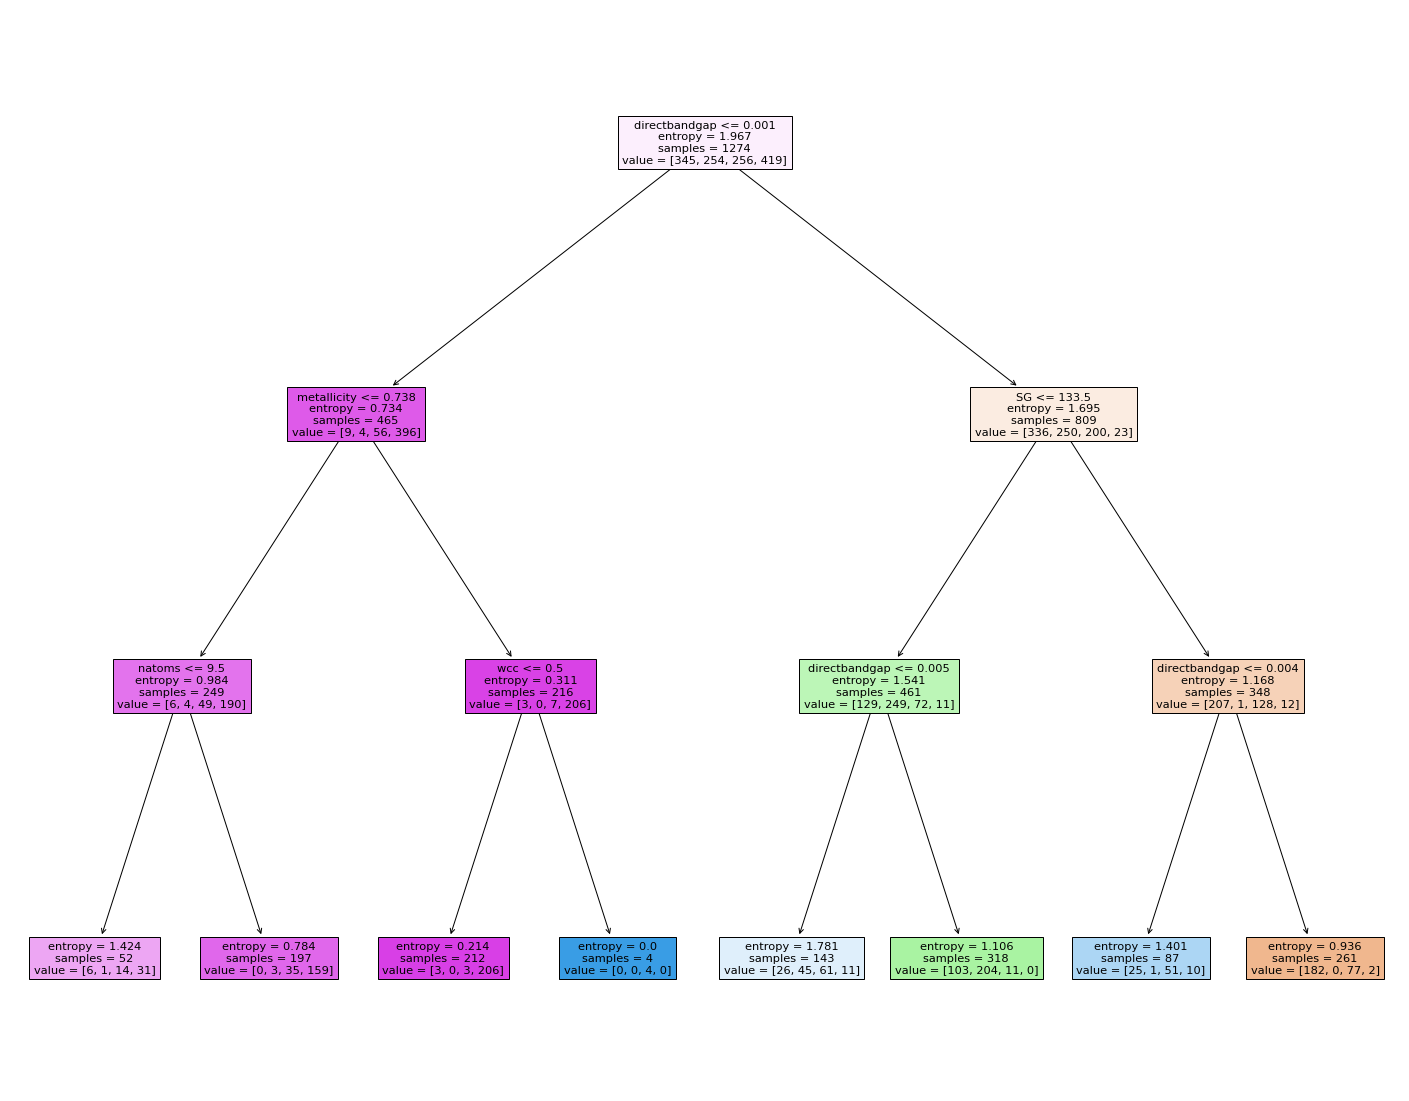

In [29]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf2,feature_names=x.columns,filled=True)
plt.savefig('fig.pdf')

In [2]:
data = pd.read_csv('/Users/chaithanya/Documents/DDP/DDP-dump/Data/fulldata.csv',index_col=0)

In [3]:
len(data)

13143

In [4]:
list(data.columns)

['NoE',
 'Stoich. Formula',
 'SG',
 'Point Group',
 'split',
 's_bin',
 'p_bin',
 'd_bin',
 'f_bin',
 'S_mean',
 'S_var',
 'P_mean',
 'P_var',
 'D_mean',
 'D_var',
 'F_mean',
 'F_var',
 'row_mean',
 'row_var',
 'col_mean',
 'col_var',
 'en_mean',
 'en_var',
 'rad_mean',
 'rad_var',
 'onsite_en',
 'SG_freq',
 'C1',
 'C2',
 'C2h',
 'C2v',
 'C3',
 'C3h',
 'C3v',
 'C4',
 'C4h',
 'C4v',
 'C6',
 'C6h',
 'C6v',
 'Ci',
 'Cs',
 'D2',
 'D2d',
 'D2h',
 'D3',
 'D3d',
 'D3h',
 'D4',
 'D4h',
 'D6',
 'D6h',
 'O',
 'Oh',
 'S4',
 'S6',
 'T',
 'Td',
 'Th',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c6',
 'c7',
 'c8',
 'c9',
 'c10',
 'c11',
 'c12',
 'c13',
 'c14',
 'c15',
 'c16',
 'c17',
 'c18',
 'c19',
 'c20',
 'c21',
 'c22',
 'c23',
 'c24',
 'c25',
 'c26',
 'c27',
 'c28',
 'c29',
 'c30',
 'c31',
 'c32',
 'r1',
 'r2',
 'r3',
 'r4',
 'r5',
 'r6',
 'r7',
 'AtomicMass_avg',
 'AtomicMass_var',
 'Top_Class',
 'SG_vec',
 'class0',
 'class1',
 'class2',
 'class3',
 'class4']

In [5]:
data.drop(columns = ['Stoich. Formula', 'Point Group','split','rad_mean','rad_var','SG_vec','SG_freq'],inplace=True)
x = data.drop(columns = ['Top_Class'])
y = data['Top_Class']

In [6]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [18]:
clf = DecisionTreeClassifier(random_state=1234,max_leaf_nodes=8)
model = clf.fit(x, y)

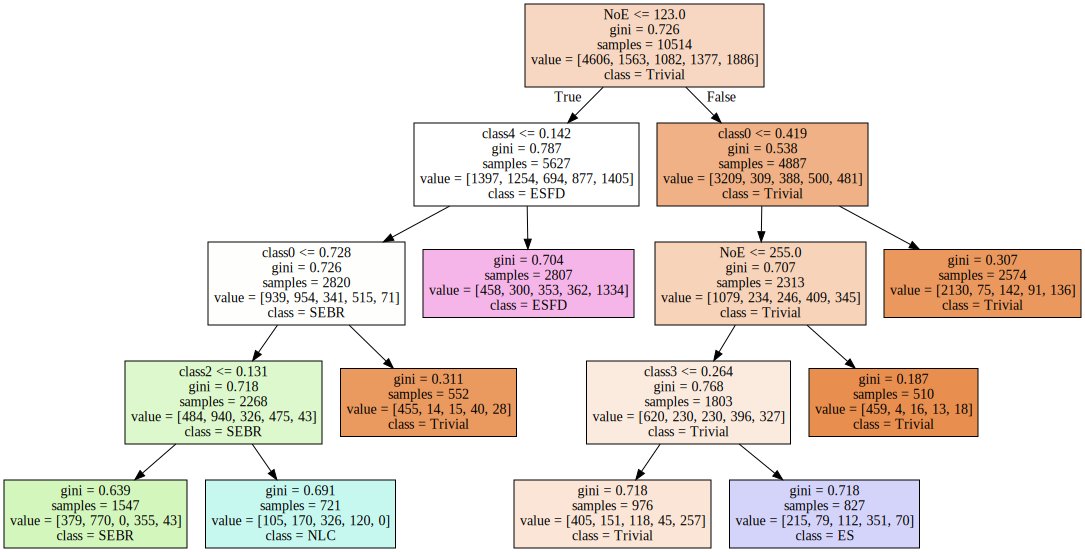

In [19]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x.columns,  
                                class_names=['Trivial','SEBR','NLC','ES','ESFD'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [20]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'